# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | san vicente
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | richmond
City not found. Skipping...
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | grand river south east
Processing Record 11 of Set 1 | trapani
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | praya
City not found. Skipping...
Processing Record 14 of Set 1 | bontang
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | nyurba
Processing Record 18 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 |

Processing Record 42 of Set 4 | vallenar
Processing Record 43 of Set 4 | anloga
Processing Record 44 of Set 4 | olafsvik
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | jamestown
Processing Record 47 of Set 4 | akdepe
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | sisimiut
Processing Record 1 of Set 5 | haines city
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 5 | senador pompeu
City not found. Skipping...
Processing Record 3 of Set 5 | nishihara
Processing Record 4 of Set 5 | vuktyl
Processing Record 5 of Set 5 | santiago del estero
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | mercedes
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | cockburn town
City not found. Skipping...
Processing Record 10 of Set 5 | vila velha
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | barrow
Processing Record 13 of Set 5 | nynashamn
Processing Recor

Processing Record 26 of Set 8 | quelimane
Processing Record 27 of Set 8 | yumen
Processing Record 28 of Set 8 | tromso
Processing Record 29 of Set 8 | cidreira
Processing Record 30 of Set 8 | ishigaki
Processing Record 31 of Set 8 | tazovskiy
Processing Record 32 of Set 8 | andreapol
Processing Record 33 of Set 8 | werda
Processing Record 34 of Set 8 | glendive
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | fort frances
Processing Record 37 of Set 8 | at-bashi
City not found. Skipping...
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | foz
Processing Record 41 of Set 8 | samarai
Processing Record 42 of Set 8 | ciro marina
Processing Record 43 of Set 8 | kungurtug
Processing Record 44 of Set 8 | bentiu
Processing Record 45 of Set 8 | murmashi
Processing Record 46 of Set 8 | kenitra
City not found. Skipping...
Processing Record 47 of Set 8 | micheweni
Processing Record 48 of Set 8 | kaeo
City not found.

Processing Record 19 of Set 12 | nanzhang
Processing Record 20 of Set 12 | cheyenne
Processing Record 21 of Set 12 | periyanayakkanpalaiyam
Processing Record 22 of Set 12 | glassboro
Processing Record 23 of Set 12 | mount pleasant
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | pyaozerskiy
Processing Record 27 of Set 12 | lagoa
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['san vicente',
  'tasiilaq',
  'richmond',
  'torbay',
  'busselton',
  'hermanus',
  'bethel',
  'atuona',
  'bambous virieux',
  'grand river south east',
  'trapani',
  'nikolskoye',
  'praya',
  'bontang',
  'lebu',
  'mataura',
  'nyurba',
  'ushuaia',
  'port alfred',
  'ancud',
  'bluff',
  'bengkulu',
  'shebalino',
  'rikitea',
  'maceio',
  'hilo',
  'kapaa',
  'nicoya',
  'norman wells',
  'bairiki',
  'avarua',
  'ribeira grande',
  'dwarka',
  'port augusta',
  'cape town',
  'saskylakh',
  'lalmohan',
  'hals',
  'albany',
  'arecibo',
  'hobyo',
  'tessalit',
  'lompoc',
  'tabuk',
  'peniche',
  'hamilton',
  'arraial do cabo',
  'new norfolk',
  'moose factory',
  'vaini',
  'kharan',
  'axim',
  'zachary',
  'maragogi',
  'sorland',
  'ashland',
  'kloulklubed',
  'solikamsk',
  'phan rang',
  'kapoeta',
  'anchorage',
  'coihaique',
  'celestun',
  'ayagoz',
  'cabo san lucas',
  'morant bay',
  'matay',
  'mount gambier',
  'biak',
  'namatanai',
  'punta 

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san vicente,86,ML,1579828970,14,13.30,-4.90,77.29,10.74
1,tasiilaq,25,GL,1579829180,51,65.61,-37.64,14.00,9.17
2,richmond,40,US,1579828958,74,37.55,-77.46,41.00,3.36
3,torbay,90,CA,1579829170,79,47.67,-52.73,28.00,17.22
4,busselton,2,AU,1579829180,59,-33.65,115.33,72.00,1.99


In [7]:
weather_dataframe.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san vicente,86,ML,1579828970,14,13.30,-4.90,77.29,10.74
1,tasiilaq,25,GL,1579829180,51,65.61,-37.64,14.00,9.17
2,richmond,40,US,1579828958,74,37.55,-77.46,41.00,3.36
3,torbay,90,CA,1579829170,79,47.67,-52.73,28.00,17.22
4,busselton,2,AU,1579829180,59,-33.65,115.33,72.00,1.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
time.strftime('%x')

'01/23/20'

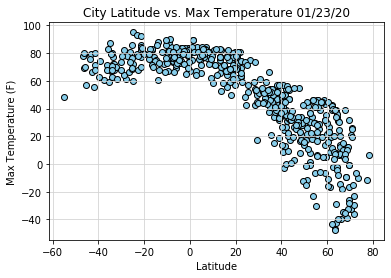

In [10]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

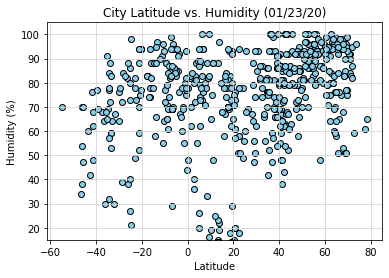

In [11]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

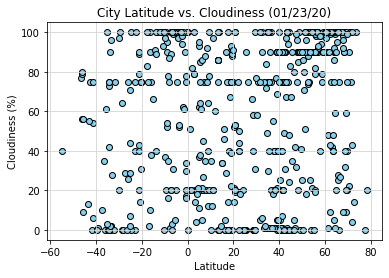

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

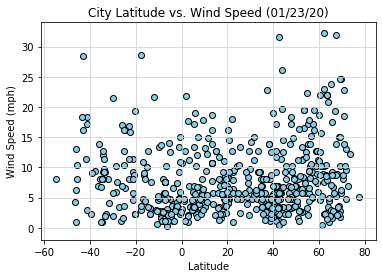

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [ ]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#Southern Hemisphere (less than 0 degrees latitude)

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
#def plot_linear(x_values, y_values, title, text_coordinates):
    #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regress_values = x_values*slope + intercept
    #line_eq = 'y= '+ str(round(slope,2)) + 'x + ' +str(round(intercept,2))
    
    #plt.scatter(x_values, y_values)
    #plt.plot(x_values, regress_values, "r-")
    #plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    #plt.xlabel('Lattitude')
    #plt.ylabel(title)
    #print(f'The r-squared is: {rvalue}')
    #plt.show()
    

In [18]:
north = weather_dataframe[weather_dataframe["Lat"] >= 0]
north.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,san vicente,86,ML,1579828970,14,13.30,-4.90,77.29,10.74
1,tasiilaq,25,GL,1579829180,51,65.61,-37.64,14.00,9.17
2,richmond,40,US,1579828958,74,37.55,-77.46,41.00,3.36
3,torbay,90,CA,1579829170,79,47.67,-52.73,28.00,17.22
6,bethel,1,US,1579829181,68,41.37,-73.41,37.00,1.81


In [ ]:
south = weather_dataframe[weather_dataframe["Lat"] < 0]
south.head()

In [14]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      57.165997
1      16.581883
2      38.351912
3      30.500426
4      93.591617
         ...    
561    25.853153
562    31.470225
563    49.973974
564    16.411198
565    37.188155
Name: Lat, Length: 566, dtype: float64


In [15]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.78x +67.48


The r-squared is: -0.7989536926901019


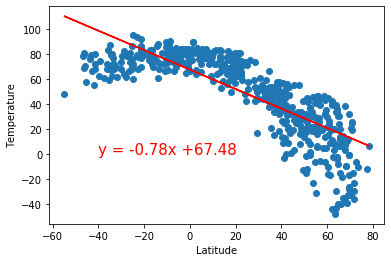

In [16]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression